# Control Selection Analysis

##### 12 Jan, 2019

In this Jupyter notebook I am comparing 500,000 generations of *seed05*'s *control* condition with four different selection pressures. The parameter files I was using before had the following value for selection:  

SELECTION_SCHEME        fitness_proportionate   1000

The value *1000* seems to be the selection strength, and changing this to *250* did produce different results. However, the default value for **SELECTION_PRESSURE** is 0.998, so I wanted to make sure that reducing this by 4 (i.e. **SELECTION_PRESSURE=0.2495**), as we're doing with the default way, produces similar results. 

This notebook will graph out genome size, fitness, and the number of coding bases for the *seed05* control condition for both the explicit (*SELECTION_PRESSURE=0.998*, *SELECTION_PRESSURE=0.2495*) and for the above implicit (fitness_proportionate 1000, fitness_proportionate 250) conditions.

## Table of Contents

1. [genome size](#genome_size)
2. **number of functional genes**
3. **mean size of functional genes**
4. **proportion of coding bases (i.e. inside functional genes)**
5. **metabolic error**

<a id='genome_size'></a>
## 1. Genome Size

### Read in the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

WINDOW_SIZE = 10000

# The root directory where our data is stored and where we want to output the results
# Desktop
INPUT_ROOT_DIR = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//seed05//Selection_Experiments//Control_Experiments//"
OUTPUT_ROOT_DIR = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//seed05//Selection_Experiments//Control_Experiments//Output//"

fitness_best_names = ['generation', 'population_size', 'fitness', 'genome_size', 'metabolic_error', 'parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amount_present']

print("Reading in data...")
df_control_default_1000 = pd.read_csv(INPUT_ROOT_DIR + "selection_1000//stats//stat_fitness_best.out", delim_whitespace=True, skiprows=18, header=0, names= fitness_best_names)
df_control_default_250 = pd.read_csv(INPUT_ROOT_DIR + "selection_250//stats//stat_fitness_best.out", delim_whitespace=True, skiprows=18, header=0, names=fitness_best_names)
df_control_998 = pd.read_csv(INPUT_ROOT_DIR + "selection_0_998//stats//stat_fitness_best.out", delim_whitespace=True, skiprows=18, header=0, names= fitness_best_names)
df_control_2495 = pd.read_csv(INPUT_ROOT_DIR + "selection_0_2495//stats//stat_fitness_best.out", delim_whitespace=True, skiprows=18, header=0, names= fitness_best_names)
print("done.")

Reading in data...
done.


### Plot the genome size

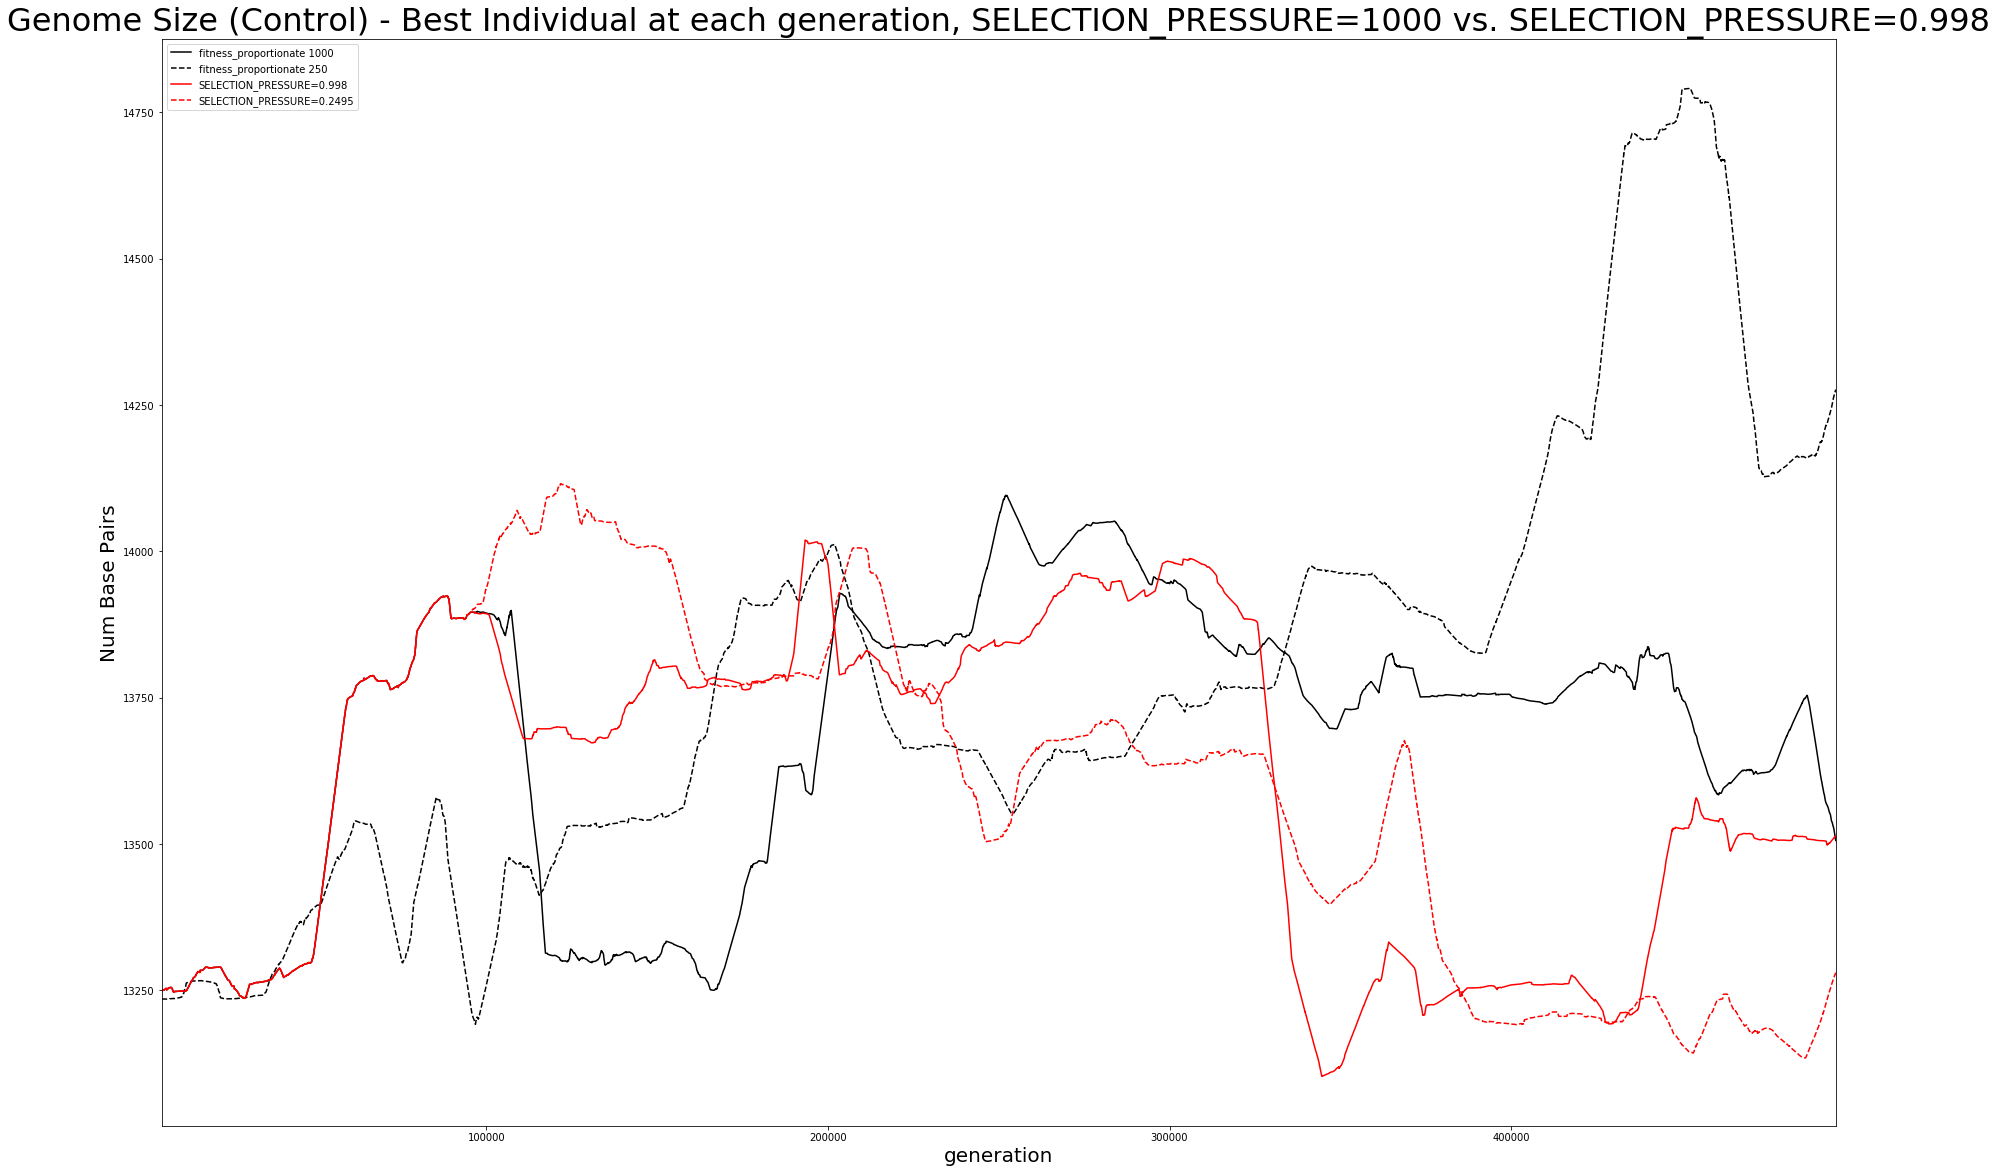

In [8]:
# Create new figure
fig_genome_size_best = plt.figure(figsize=(30,20))
ax_genome_size_best = fig_genome_size_best.add_subplot(111)
ax_genome_size_best.set_title("Genome Size (Control) - Best Individual at each generation, SELECTION_PRESSURE=1000 vs. SELECTION_PRESSURE=0.998", fontsize=32)
ax_genome_size_best.set_xlabel("Generation", fontsize=20)
ax_genome_size_best.set_ylabel("Num Base Pairs", fontsize=20)

# Plot the default (fitness_proportionate 1000)
df_tmp1 = df_control_default_1000[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp1.plot(x='generation', y='genome_size', linestyle='-', color=(0.0,0.0,0.0), label='fitness_proportionate 1000', ax=ax_genome_size_best)

# Plot the reduced selection (fitness_proportionate 250)
df_tmp2 = df_control_default_250[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp2.plot(x='generation', y='genome_size', linestyle='--', color=(0.0, 0.0, 0.0), label='fitness_proportionate 250', ax=ax_genome_size_best)

# Plot SELECTION_PRESSURE=0.998
df_tmp3 = df_control_998[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp3.plot(x='generation', y='genome_size', linestyle='-', color=(1.0, 0.0, 0.0), label='SELECTION_PRESSURE=0.998', ax=ax_genome_size_best)

# Plot SELECTION_PRESSURE=0.2495
df_tmp4 = df_control_2495[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp4.plot(x='generation', y='genome_size', linestyle='--', color=(1.0,0.0,0.0), label='SELECTION_PRESSURE=0.2495', ax=ax_genome_size_best)

# Save and close the figure
fig_genome_size_best.savefig(OUTPUT_ROOT_DIR + "genome_size-selection=1000_vs_selection=998.png")
plt.show()
plt.close(fig_genome_size_best)
